In [129]:
import sys
print (sys.version)

2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609]


In [130]:
import numpy as np
import pandas as pd
properties_file = '../input/properties_2016.csv'
training_file = '../input/train_2016_v2.csv'
properties = pd.read_csv(properties_file, dtype={
    'fireplaceflag': np.bool, 'hashottuborspa': np.bool,
    'propertycountylandusecode': np.str,
    'propertyzoningdesc': np.str}, converters={
    'taxdelinquencyflag': lambda x: np.bool(True) if x == 'Y' else np.bool(False)})  # avoid mixed type warning
print ('loaded properties from ' + properties_file)
print ('properties shape: ' + str(properties.shape))
train = pd.read_csv(training_file)
print ('loaded transaction data from ' + training_file)
print ('train shape: ' + str(train.shape))

# save a copy of the properties data 
properties_unscaled = properties.copy(deep=True)

loaded properties from ../input/properties_2016.csv
properties shape: (2985217, 58)
loaded transaction data from ../input/train_2016_v2.csv
train shape: (90275, 3)


In [131]:
# take the log of select columns to reduce skew

log_columns = ['landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'taxamount', 'taxvaluedollarcnt',
               'calculatedfinishedsquarefeet']
properties[log_columns].describe()

,landtaxvaluedollarcnt,structuretaxvaluedollarcnt,taxamount,taxvaluedollarcnt,calculatedfinishedsquarefeet
count,2.917484e+06,2.930235e+06,2.953967e+06,2.942667e+06,2.929652e+06
mean,2.524780e+05,1.708836e+05,5.377607e+03,4.204790e+05,1.827162e+03
std,4.450132e+05,4.020683e+05,9.183107e+03,7.263467e+05,1.819780e+03
min,1.000000e+00,1.000000e+00,1.340000e+00,1.000000e+00,1.000000e+00
25%,7.483600e+04,7.480000e+04,2.461070e+03,1.796750e+05,1.213000e+03
50%,1.670420e+05,1.225900e+05,3.991780e+03,3.060860e+05,1.572000e+03
75%,3.069180e+05,1.968890e+05,6.201005e+03,4.880000e+05,2.136000e+03
max,9.024622e+07,2.514860e+08,3.458861e+06,2.827860e+08,9.525760e+05


In [132]:
for column_name in log_columns:
    properties[column_name] = properties[column_name].apply(lambda x: np.log(x) if pd.notnull(x) else x)
properties[log_columns].describe()

,landtaxvaluedollarcnt,structuretaxvaluedollarcnt,taxamount,taxvaluedollarcnt,calculatedfinishedsquarefeet
count,2.917484e+06,2.930235e+06,2.953967e+06,2.942667e+06,2.929652e+06
mean,1.188352e+01,1.168654e+01,8.234322e+00,1.255060e+01,7.396858e+00
std,1.119799e+00,8.475942e-01,8.526816e-01,9.425025e-01,4.484323e-01
min,0.000000e+00,0.000000e+00,2.926696e-01,0.000000e+00,0.000000e+00
25%,1.122305e+01,1.122257e+01,7.808351e+00,1.209890e+01,7.100852e+00
50%,1.202600e+01,1.171660e+01,8.291993e+00,1.263162e+01,7.360104e+00
75%,1.263434e+01,1.219040e+01,8.732467e+00,1.309807e+01,7.666690e+00
max,1.831805e+01,1.934290e+01,1.505645e+01,1.946020e+01,1.376693e+01


In [133]:
# these are either one value or null, so we can tell the model that they're Boolean

true_false_columns = ['hashottuborspa','fireplaceflag']
properties[true_false_columns].describe()

,hashottuborspa,fireplaceflag
count,69014,5163
unique,1,1
top,True,True
freq,69014,5163


In [134]:
for column_name in true_false_columns:
    properties[column_name] = properties[column_name].apply(lambda x: False if pd.isnull(x) else True)
properties[true_false_columns].describe()

,hashottuborspa,fireplaceflag
count,2985217,2985217
unique,2,2
top,False,False
freq,2916203,2980054


In [135]:
# transform tax delinquency year
print('unique tax delinquency year values: ' + str(properties['taxdelinquencyyear'].unique()))

unique tax delinquency year values: [ nan  13.  15.  11.  14.   9.  10.   8.  12.   7.   6.   2.  92.   5.   3.
   4.  95.  91.  93.  98.  82.  79.  94.  97.  90.  99.   0.   1.  87.  84.
  86.  88.  96.]


In [136]:
properties['taxdelinquencyyear'] = properties['taxdelinquencyyear'].apply(
    lambda x: (17 - x if x < 20 else 117 - x) if pd.notnull(x) else x)

In [137]:
print('unique tax delinquency year values: ' + str(properties['taxdelinquencyyear'].unique()))

unique tax delinquency year values: [ nan   4.   2.   6.   3.   8.   7.   9.   5.  10.  11.  15.  25.  12.  14.
  13.  22.  26.  24.  19.  35.  38.  23.  20.  27.  18.  17.  16.  30.  33.
  31.  29.  21.]


In [138]:
# scale the latitude and longitude using the min-max scaler
location_columns = ['latitude', 'longitude']
properties[location_columns].describe()

,latitude,longitude
count,2.973780e+06,2.973780e+06
mean,3.400147e+07,-1.182019e+08
std,2.433812e+05,3.453171e+05
min,3.332439e+07,-1.194758e+08
25%,3.382768e+07,-1.183930e+08
50%,3.400825e+07,-1.181725e+08
75%,3.416186e+07,-1.179495e+08
max,3.481965e+07,-1.175543e+08


In [139]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(copy=True)
scaled_columns = list()
for column_name in location_columns:
    mean_value = properties[column_name].mean()
    properties[column_name].fillna(inplace=True, value=mean_value)
    scaled_columns.append(column_name)
properties[scaled_columns] = min_max_scaler.fit_transform(properties[scaled_columns])
properties[location_columns].describe()

,latitude,longitude
count,2.985217e+06,2.985217e+06
mean,4.528174e-01,6.629559e-01
std,1.624562e-01,1.793710e-01
min,0.000000e+00,0.000000e+00
25%,3.369858e-01,5.640387e-01
50%,4.564712e-01,6.773080e-01
75%,5.597367e-01,7.939581e-01
max,1.000000e+00,1.000000e+00


In [140]:
# label encoding for several coded features
from sklearn.preprocessing import LabelEncoder
label_encode_columns = ['propertycountylandusecode', 'propertyzoningdesc', 'fips', 'regionidzip']
for column_name in label_encode_columns:
    if column_name in ['fips', 'regionidzip']:
        properties[column_name] = properties[column_name].fillna('ZZZ')
    label_encoder = LabelEncoder()
    label_encoder.fit(list(properties[column_name].values))
    properties[column_name] = label_encoder.transform(list(properties[column_name].values))

In [141]:
print (properties.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            int64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottubor

In [142]:
# finally drop columns earlier model runs have told us are not significant

properties = properties.drop(
    [
        'regionidcounty',
        'assessmentyear',
        'fireplaceflag',
        'pooltypeid10',
        'storytypeid',
        'typeconstructiontypeid'
    ], axis=1)
print (properties.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 52 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            int64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottubor

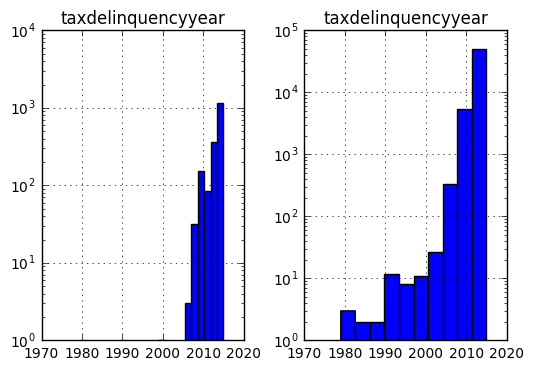

In [143]:
# merge the properties and transaction data to get the traiing data
train_df = train.merge(properties, how='left', on='parcelid')
x_train = train_df.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
test_columns_to_drop = ['parcelid']
x_test = properties.drop(test_columns_to_drop, axis=1)
print ('train shape: %s, test shape: %s' % ((x_train.shape,), (x_test.shape,)))

# also we need an unscaled copy for some pictures
train_unscaled = train.merge(properties_unscaled, how='left', on='parcelid')

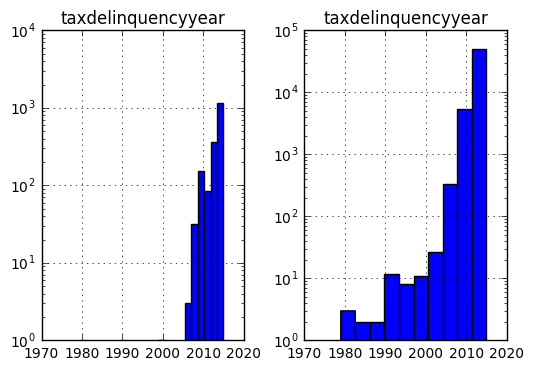

In [144]:
# before we filter outliers and build the model we need to make some graphs
import matplotlib.pyplot as plt
import operator
%matplotlib inline

na_counts = {column_name: properties[column_name].isnull().sum() for column_name in list(properties) if
             column_name not in ['parcelid']}
x_pos = np.arange(len(na_counts))
plt.figure()
# let's sort these values before we graph them
sorted_counts = sorted(na_counts.items(), key=operator.itemgetter(1), reverse=True)
sorted_values = [item[1] for item in sorted_counts]
plt.bar(x_pos, sorted_values, align='center')
sorted_keys = [item[0] for item in sorted_counts]
plt.xlim([-1, len(x_pos)])
plt.xticks(x_pos, sorted_keys, rotation='vertical', fontsize=8)
plt.yscale('log', nonposy='clip')
plt.tight_layout()
plt.suptitle('Properties data null counts by column')
plt.show()

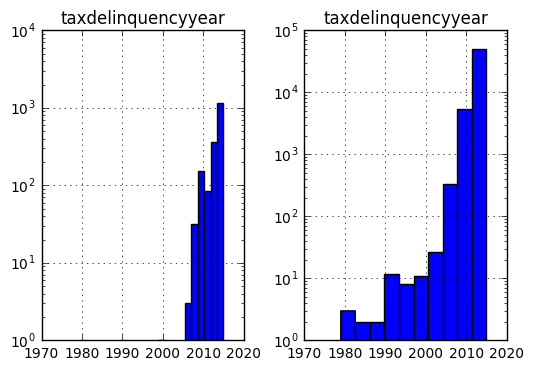

In [145]:
na_counts = {column_name: train_df[column_name].isnull().sum() for column_name in list(train_df) if
             column_name not in ['parcelid']}
x_pos = np.arange(len(na_counts) - 2)
plt.figure()
# let's use the ordering from the properties
sorted_values = [na_counts[key] for key in sorted_keys]
plt.bar(x_pos, sorted_values, align='center')
plt.xlim([-1, len(x_pos)])
plt.xticks(x_pos, sorted_keys, rotation='vertical', fontsize=8)
plt.yscale('log', nonposy='clip')
plt.tight_layout()
plt.suptitle('Training data null counts by column')
plt.show()

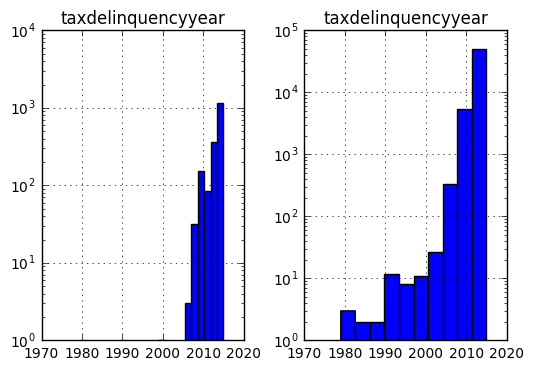

In [146]:
# visualize the error
column_name = 'logerror'
fig, ax = plt.subplots()
ax.scatter(range(train.shape[0]), np.sort(train.logerror.values))
plt.ylabel(column_name)
plt.show()
del fig

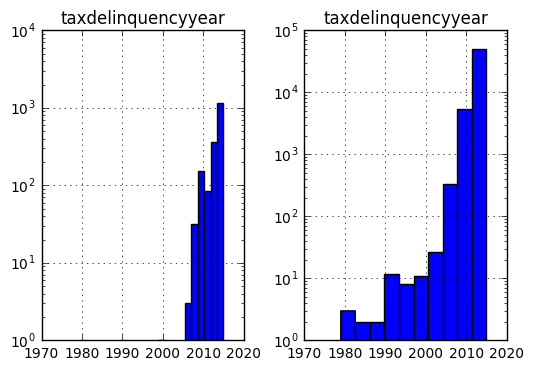

In [147]:
# histogram for the log-error
column_name = 'logerror'
fig, axes = plt.subplots(ncols=2)
print('%s min: %.4f max: %.4f' % (column_name, train_df[column_name].min(), train_df[column_name].max()))
bins = 40
train_df.hist(ax=axes[0], bins=bins, column=column_name)
train_df.hist(ax=axes[1], bins=bins, column=column_name)
axes[1].set_yscale('log')
plt.show()
del fig

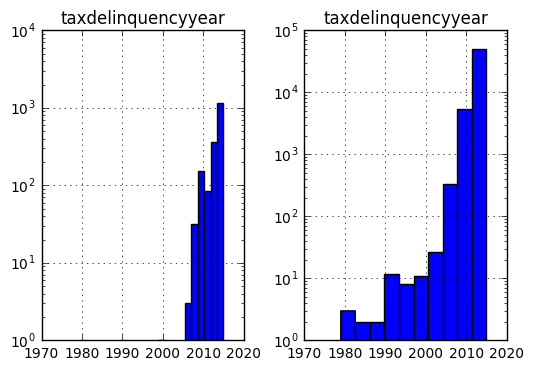

In [148]:
# we will map the properties by FIPS code using this map
colors = {6037: 'red', 6059: 'blue', 6111: 'green'}

# first let's map the outliers from the training data
quantile = 0.995
log_error_abs_quantile = train_unscaled[column_name].abs().quantile(quantile)
print ('%s: at quantile level %f we have %f' % (column_name, quantile, log_error_abs_quantile))
outliers = train_unscaled.loc[abs(train_unscaled[column_name]) > log_error_abs_quantile][['latitude', 'longitude', 'fips']]
print ('outliers shape : ', (outliers.shape,))
fig, ax = plt.subplots()
ax.scatter(outliers['latitude'], outliers['longitude'], c=outliers['fips'].apply(lambda x: colors[x]))
plt.show()
del fig

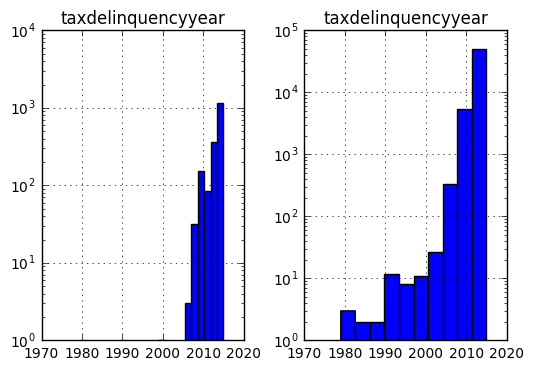

In [149]:
# now let's map all the training data
fig, ax = plt.subplots()
t1 = train_unscaled[['latitude', 'longitude', 'fips']].dropna()
ax.scatter(t1['latitude'], t1['longitude'], c=t1['fips'].apply(lambda x: colors[x]))
plt.show()
del fig

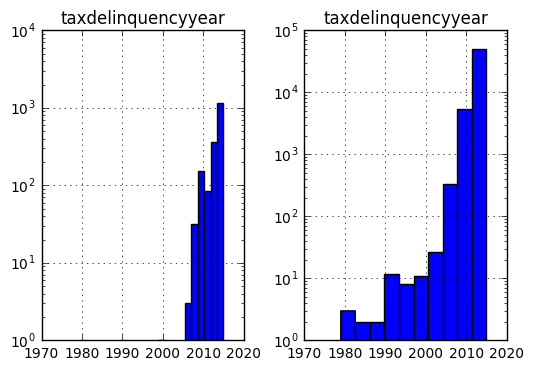

In [153]:
# now let's map all the test data; this will take a while
fig, ax = plt.subplots()
t0 = properties_unscaled[['latitude', 'longitude', 'fips']].dropna()
print('if we filter out n/as from the test data we have ' + str((t0.shape,)))
ax.scatter(t0['latitude'], t0['longitude'], c=t0['fips'].apply(lambda x: colors[x]))
plt.show()
del fig

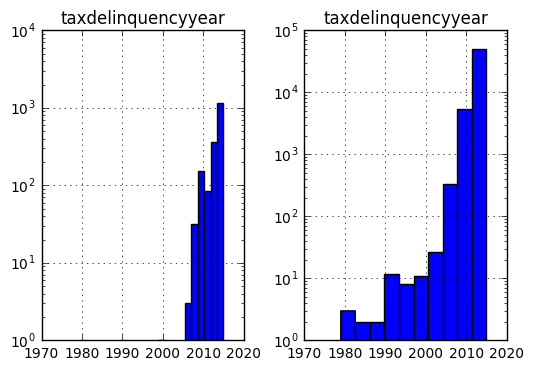

In [156]:
# histograms for property features, training data
fig, axes = plt.subplots(ncols=2, nrows=2)
column_name_00 = 'calculatedfinishedsquarefeet'
train_unscaled.hist(ax=axes[0, 0], bins=50, column=column_name_00)
axes[0, 0].set_yscale('log')
axes[0, 0].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
column_name_10 = 'bedroomcnt'
train_unscaled.hist(ax=axes[1, 0], bins=50, column=column_name_10)
axes[1, 0].set_yscale('log')
column_name_01 = 'lotsizesquarefeet'
train_unscaled.hist(ax=axes[0, 1], bins=50, column=column_name_01)
axes[0, 1].set_yscale('log')
axes[0, 1].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
column_name_11 = 'bathroomcnt'
train_unscaled.hist(ax=axes[1, 1], bins=50, column=column_name_11)
axes[1, 1].set_yscale('log')
plt.show()
del fig

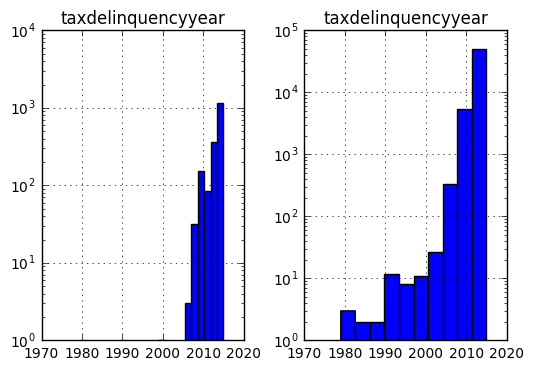

In [157]:
# histograms for property features, test data
fig, axes = plt.subplots(ncols=2, nrows=2)
column_name_00 = 'calculatedfinishedsquarefeet'
properties_unscaled.hist(ax=axes[0, 0], bins=50, column=column_name_00)
axes[0, 0].set_yscale('log')
axes[0, 0].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
column_name_10 = 'bedroomcnt'
properties_unscaled.hist(ax=axes[1, 0], bins=50, column=column_name_10)
axes[1, 0].set_yscale('log')
column_name_01 = 'lotsizesquarefeet'
properties_unscaled.hist(ax=axes[0, 1], bins=50, column=column_name_01)
axes[0, 1].set_yscale('log')
axes[0, 1].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
column_name_11 = 'bathroomcnt'
properties_unscaled.hist(ax=axes[1, 1], bins=50, column=column_name_11)
axes[1, 1].set_yscale('log')
plt.show()
del fig

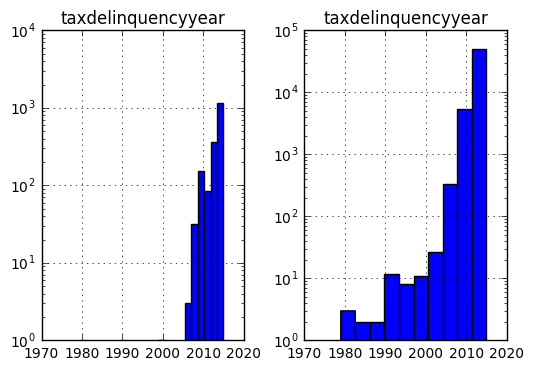

In [158]:
# tax data, training data
fig, axes = plt.subplots(ncols=2, nrows=2)
column_name_00 = 'taxvaluedollarcnt'
train_unscaled.hist(ax=axes[0, 0], bins=50, column=column_name_00)
axes[0, 0].set_yscale('log')
axes[0, 0].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
column_name_10 = 'taxamount'
train_unscaled.hist(ax=axes[1, 0], bins=50, column=column_name_10)
axes[1, 0].set_yscale('log')
axes[1, 0].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
column_name_01 = 'structuretaxvaluedollarcnt'
train_unscaled.hist(ax=axes[0, 1], bins=50, column=column_name_01)
axes[0, 1].set_yscale('log')
axes[0, 1].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
column_name_11 = 'landtaxvaluedollarcnt'
train_unscaled.hist(ax=axes[1, 1], bins=50, column=column_name_11)
axes[1, 1].set_yscale('log')
plt.show()
del fig

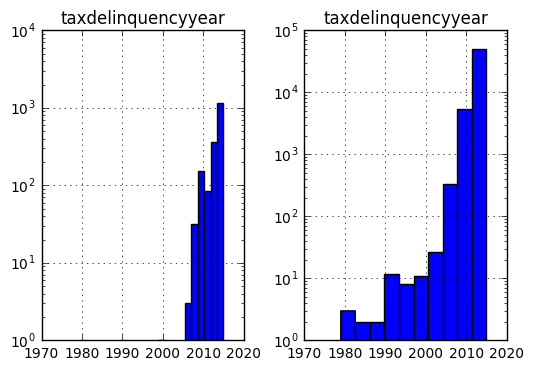

In [159]:
# tax data, test data
fig, axes = plt.subplots(ncols=2, nrows=2)
column_name_00 = 'taxvaluedollarcnt'
properties_unscaled.hist(ax=axes[0, 0], bins=50, column=column_name_00)
axes[0, 0].set_yscale('log')
axes[0, 0].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
column_name_10 = 'taxamount'
properties_unscaled.hist(ax=axes[1, 0], bins=50, column=column_name_10)
axes[1, 0].set_yscale('log')
axes[1, 0].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
column_name_01 = 'structuretaxvaluedollarcnt'
properties_unscaled.hist(ax=axes[0, 1], bins=50, column=column_name_01)
axes[0, 1].set_yscale('log')
axes[0, 1].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
column_name_11 = 'landtaxvaluedollarcnt'
properties_unscaled.hist(ax=axes[1, 1], bins=50, column=column_name_11)
axes[1, 1].set_yscale('log')
plt.show()
del fig

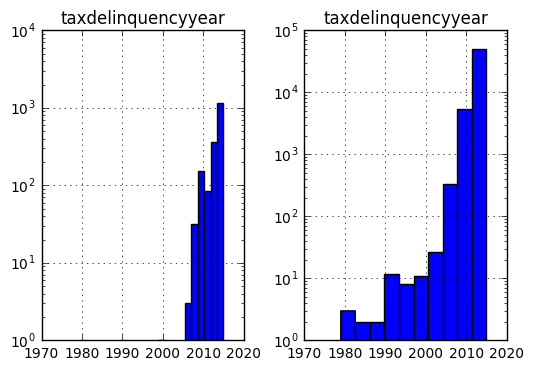

In [160]:
# histogram for the year built data
fig, axes = plt.subplots(ncols=2)
column_name = 'yearbuilt'
train_unscaled.hist(ax=axes[0], bins=50, column=column_name)
axes[0].set_yscale('log')
axes[0].set_xlim(1800, 2020)
properties_unscaled.hist(ax=axes[1], bins=50, column=column_name)
axes[1].set_yscale('log')
axes[1].set_xlim(1800, 2020)
plt.show()
del fig

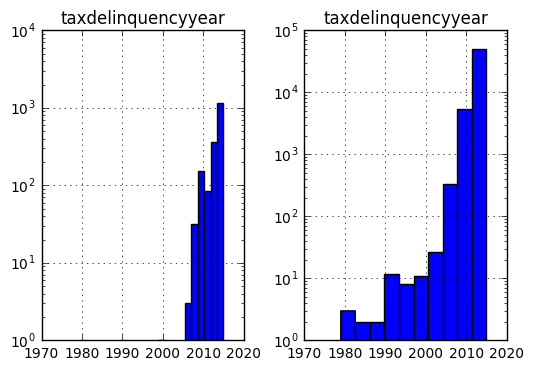

In [162]:
properties_unscaled['taxdelinquencyyear'] = properties_unscaled['taxdelinquencyyear'].apply(
    lambda x: (2000 + x if x < 20 else 1900 + x) if pd.notnull(x) else x)
train_unscaled['taxdelinquencyyear'] = train_unscaled['taxdelinquencyyear'].apply(
    lambda x: (2000 + x if x < 20 else 1900 + x) if pd.notnull(x) else x)

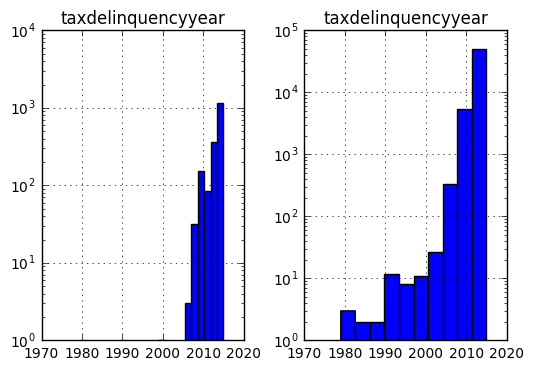

In [163]:
fig, axes = plt.subplots(ncols=2)
column_name = 'taxdelinquencyyear'
train_unscaled.hist(ax=axes[0], bins=10, column=column_name)
axes[0].set_yscale('log')
axes[0].set_xticks([1970, 1980, 1990, 2000, 2010, 2020])
properties_unscaled.hist(ax=axes[1], bins=10, column=column_name)
axes[1].set_yscale('log')
axes[1].set_xticks([1970, 1980, 1990, 2000, 2010, 2020])
plt.show()
del fig

In [164]:
# filter outliers 
lower_limit = -0.4
upper_limit = 0.5
train_df = train_df[(train_df.logerror < upper_limit) & (train_df.logerror > lower_limit)]
print ('after outlier filtering, train shape: %s, test shape: %s' % ((train_df.shape,), (x_test.shape,)))

after outlier filtering, train shape: ((88799, 54),), test shape: ((2985217, 51),)


In [165]:
# build the XGBoost matrices and get the log-error mean
import xgboost as xgb

train_columns_to_drop = ['parcelid', 'logerror', 'transactiondate'] 
x_train = train_df.drop(train_columns_to_drop, axis=1)
y_train = train_df['logerror'].values.astype(np.float32)
y_mean = np.mean(y_train)
print ('y_train shape: %s' % (y_train.shape,))
print ('y_mean (the XGBoost base score) = %.6f' % y_mean)

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

y_train shape: (88799,)
y_mean (the XGBoost base score) = 0.009000


In [166]:
# xgboost parameters
random_seed = 1
xgboost_parameters = {
    'alpha': 0.0,
    'base_score': y_mean,
    'booster': 'gbtree',
    'colsample_bytree': 1.0,
    'eta': 0.025,  #  default = 0.03 
    'eval_metric': 'mae',
    'gamma': 0.0,  # default is 0
    'lambda': 1.05,  # default is 1.0
    'max_depth': 7,  #  default = 6
    'objective': 'reg:linear',
    'seed': random_seed,
    'silent': 1,
    'subsample': 0.7
}

In [167]:
# cross-validation
cross_validation_nfold = 8
xgb_boost_rounds = 1200

cv_result = xgb.cv(xgboost_parameters, dtrain,
                   early_stopping_rounds=100, 
                   nfold=cross_validation_nfold,
                   num_boost_round=xgb_boost_rounds,
                   seed=random_seed,
                   show_stdv=False,
                   verbose_eval=5)
actual_boost_rounds = len(cv_result)

[0]	train-mae:0.0545467	test-mae:0.0545604


[5]	train-mae:0.054342	test-mae:0.0544297


[10]	train-mae:0.0541683	test-mae:0.0543293


[15]	train-mae:0.0540205	test-mae:0.0542489


[20]	train-mae:0.0538865	test-mae:0.0541883


[25]	train-mae:0.0537726	test-mae:0.0541462


[30]	train-mae:0.0536714	test-mae:0.0541069


[35]	train-mae:0.0535796	test-mae:0.0540785


[40]	train-mae:0.053493	test-mae:0.0540556


[45]	train-mae:0.0534116	test-mae:0.0540309


[50]	train-mae:0.0533395	test-mae:0.0540144


[55]	train-mae:0.0532683	test-mae:0.0539999


[60]	train-mae:0.0532084	test-mae:0.0539875


[65]	train-mae:0.0531466	test-mae:0.0539761


[70]	train-mae:0.0530871	test-mae:0.0539623


[75]	train-mae:0.053034	test-mae:0.053955


[80]	train-mae:0.0529851	test-mae:0.0539498


[85]	train-mae:0.0529383	test-mae:0.0539444


[90]	train-mae:0.0528871	test-mae:0.0539384


[95]	train-mae:0.0528423	test-mae:0.0539313


[100]	train-mae:0.0527994	test-mae:0.0539265


[105]	train-mae:0.0527574	test-mae:0.0539234


[110]	train-mae:0.0527169	test-mae:0.0539204


[115]	train-mae:0.0526784	test-mae:0.0539176


[120]	train-mae:0.0526365	test-mae:0.0539146


[125]	train-mae:0.0526009	test-mae:0.0539149


[130]	train-mae:0.052562	test-mae:0.0539145


[135]	train-mae:0.0525266	test-mae:0.0539115


[140]	train-mae:0.0524867	test-mae:0.0539071


[145]	train-mae:0.0524516	test-mae:0.0539026


[150]	train-mae:0.0524174	test-mae:0.0539009


[155]	train-mae:0.0523812	test-mae:0.053901


[160]	train-mae:0.0523462	test-mae:0.0538989


[165]	train-mae:0.0523146	test-mae:0.0538986


[170]	train-mae:0.0522815	test-mae:0.0538984


[175]	train-mae:0.0522492	test-mae:0.0538971


[180]	train-mae:0.052214	test-mae:0.0538956


[185]	train-mae:0.0521821	test-mae:0.0538962


[190]	train-mae:0.052145	test-mae:0.0538979


[195]	train-mae:0.0521136	test-mae:0.053897


[200]	train-mae:0.0520819	test-mae:0.0538966


[205]	train-mae:0.0520497	test-mae:0.053896


[210]	train-mae:0.0520215	test-mae:0.0538987


[215]	train-mae:0.0519891	test-mae:0.0538999


[220]	train-mae:0.0519562	test-mae:0.0538988


[225]	train-mae:0.0519245	test-mae:0.0539015


[230]	train-mae:0.0518949	test-mae:0.0539044


[235]	train-mae:0.0518615	test-mae:0.0539074


[240]	train-mae:0.0518311	test-mae:0.0539069


[245]	train-mae:0.0518006	test-mae:0.0539093


[250]	train-mae:0.0517726	test-mae:0.053911


[255]	train-mae:0.05174	test-mae:0.0539114


[260]	train-mae:0.0517033	test-mae:0.0539111


[265]	train-mae:0.0516716	test-mae:0.053911


[270]	train-mae:0.0516415	test-mae:0.0539113


[275]	train-mae:0.0516125	test-mae:0.0539106


[280]	train-mae:0.051584	test-mae:0.0539106


[285]	train-mae:0.0515516	test-mae:0.0539081


In [168]:
print('for cross-validation we actually used %d rounds' % actual_boost_rounds)

for cross-validation we actually used 188 rounds


In [169]:
watchlist = [(dtrain, 'train')]
model = xgb.train(dict(xgboost_parameters, silent=1), dtrain=dtrain, num_boost_round=actual_boost_rounds,
                  evals=watchlist)
print ('model trained.')

[0]	train-mae:0.054546


[1]	train-mae:0.054505


[2]	train-mae:0.054463


[3]	train-mae:0.054425


[4]	train-mae:0.054388


[5]	train-mae:0.054349


[6]	train-mae:0.054312


[7]	train-mae:0.054275


[8]	train-mae:0.054241


[9]	train-mae:0.054209


[10]	train-mae:0.054176


[11]	train-mae:0.05414


[12]	train-mae:0.054108


[13]	train-mae:0.054081


[14]	train-mae:0.054053


[15]	train-mae:0.054025


[16]	train-mae:0.054001


[17]	train-mae:0.053976


[18]	train-mae:0.053955


[19]	train-mae:0.053932


[20]	train-mae:0.053905


[21]	train-mae:0.053883


[22]	train-mae:0.053859


[23]	train-mae:0.053834


[24]	train-mae:0.053815


[25]	train-mae:0.053796


[26]	train-mae:0.053774


[27]	train-mae:0.053755


[28]	train-mae:0.053734


[29]	train-mae:0.053711


[30]	train-mae:0.053692


[31]	train-mae:0.053673


[32]	train-mae:0.053657


[33]	train-mae:0.053641


[34]	train-mae:0.053625


[35]	train-mae:0.053608


[36]	train-mae:0.053594


[37]	train-mae:0.053576


[38]	train-mae:0.053559


[39]	train-mae:0.053543


[40]	train-mae:0.053525


[41]	train-mae:0.05351


[42]	train-mae:0.053497


[43]	train-mae:0.053478


[44]	train-mae:0.053461


[45]	train-mae:0.053452


[46]	train-mae:0.053433


[47]	train-mae:0.053419


[48]	train-mae:0.053405


[49]	train-mae:0.053393


[50]	train-mae:0.053382


[51]	train-mae:0.053369


[52]	train-mae:0.053353


[53]	train-mae:0.053339


[54]	train-mae:0.053326


[55]	train-mae:0.053314


[56]	train-mae:0.053298


[57]	train-mae:0.053288


[58]	train-mae:0.053275


[59]	train-mae:0.053263


[60]	train-mae:0.053253


[61]	train-mae:0.053243


[62]	train-mae:0.053235


[63]	train-mae:0.053229


[64]	train-mae:0.053217


[65]	train-mae:0.053207


[66]	train-mae:0.053196


[67]	train-mae:0.05319


[68]	train-mae:0.053179


[69]	train-mae:0.053168


[70]	train-mae:0.053156


[71]	train-mae:0.053148


[72]	train-mae:0.053134


[73]	train-mae:0.05312


[74]	train-mae:0.053105


[75]	train-mae:0.053095


[76]	train-mae:0.053089


[77]	train-mae:0.053079


[78]	train-mae:0.053065


[79]	train-mae:0.053051


[80]	train-mae:0.053044


[81]	train-mae:0.053031


[82]	train-mae:0.053021


[83]	train-mae:0.053013


[84]	train-mae:0.053


[85]	train-mae:0.052991


[86]	train-mae:0.052973


[87]	train-mae:0.052963


[88]	train-mae:0.05295


[89]	train-mae:0.052944


[90]	train-mae:0.052934


[91]	train-mae:0.052925


[92]	train-mae:0.052919


[93]	train-mae:0.052911


[94]	train-mae:0.052904


[95]	train-mae:0.052895


[96]	train-mae:0.052886


[97]	train-mae:0.052873


[98]	train-mae:0.052865


[99]	train-mae:0.05286


[100]	train-mae:0.052845


[101]	train-mae:0.052838


[102]	train-mae:0.052829


[103]	train-mae:0.052822


[104]	train-mae:0.052815


[105]	train-mae:0.052805


[106]	train-mae:0.052797


[107]	train-mae:0.05279


[108]	train-mae:0.052782


[109]	train-mae:0.052771


[110]	train-mae:0.052762


[111]	train-mae:0.052752


[112]	train-mae:0.052746


[113]	train-mae:0.05274


[114]	train-mae:0.052736


[115]	train-mae:0.052724


[116]	train-mae:0.052713


[117]	train-mae:0.052704


[118]	train-mae:0.0527


[119]	train-mae:0.052694


[120]	train-mae:0.052689


[121]	train-mae:0.052679


[122]	train-mae:0.052675


[123]	train-mae:0.052668


[124]	train-mae:0.052664


[125]	train-mae:0.052662


[126]	train-mae:0.052657


[127]	train-mae:0.052651


[128]	train-mae:0.052647


[129]	train-mae:0.052638


[130]	train-mae:0.052632


[131]	train-mae:0.052624


[132]	train-mae:0.052619


[133]	train-mae:0.052615


[134]	train-mae:0.052608


[135]	train-mae:0.052601


[136]	train-mae:0.052594


[137]	train-mae:0.052592


[138]	train-mae:0.05258


[139]	train-mae:0.052573


[140]	train-mae:0.052567


[141]	train-mae:0.052558


[142]	train-mae:0.052553


[143]	train-mae:0.052548


[144]	train-mae:0.052543


[145]	train-mae:0.052535


[146]	train-mae:0.052525


[147]	train-mae:0.052518


[148]	train-mae:0.052514


[149]	train-mae:0.052508


[150]	train-mae:0.052502


[151]	train-mae:0.052497


[152]	train-mae:0.052489


[153]	train-mae:0.052482


[154]	train-mae:0.052473


[155]	train-mae:0.052468


[156]	train-mae:0.052462


[157]	train-mae:0.052447


[158]	train-mae:0.052439


[159]	train-mae:0.052429


[160]	train-mae:0.052426


[161]	train-mae:0.05242


[162]	train-mae:0.052412


[163]	train-mae:0.052404


[164]	train-mae:0.052394


[165]	train-mae:0.052388


[166]	train-mae:0.052383


[167]	train-mae:0.052379


[168]	train-mae:0.052373


[169]	train-mae:0.052369


[170]	train-mae:0.052361


[171]	train-mae:0.052355


[172]	train-mae:0.052347


[173]	train-mae:0.052345


[174]	train-mae:0.052341


[175]	train-mae:0.052338


[176]	train-mae:0.052331


[177]	train-mae:0.052326


[178]	train-mae:0.052318


[179]	train-mae:0.052314


[180]	train-mae:0.052306


[181]	train-mae:0.052296


[182]	train-mae:0.052292


[183]	train-mae:0.052286


[184]	train-mae:0.052281


[185]	train-mae:0.052276


[186]	train-mae:0.052271


[187]	train-mae:0.052268


model trained.


In [170]:
# predict
predictions = model.predict(dtest)
y_predictions = np.array([str(round(each, 10)) for each in predictions])

our submission file has 2985217 rows 


In [171]:
output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
                       '201610': y_predictions, '201611': y_predictions, '201612': y_predictions,
                       '201710': y_predictions, '201711': y_predictions, '201712': y_predictions})
# get the column headers
output_columns = output.columns.tolist()

# rearrange the columns to put the last one first
output = output[output_columns[-1:] + output_columns[:-1]]
print ('our submission file has %d rows ' % len(output))

our submission file has 2985217 rows 


In [172]:
# make the submission file
output_filename = 'submission.csv.gz'
print ('writing submission to %s' % output_filename)
output.to_csv(output_filename, index=False, float_format='%.4f', compression='gzip')
print ('done.')

writing submission to submission.csv.gz


done.


of 51 features the model considers 51 of them significant
here are the insignificant features: []


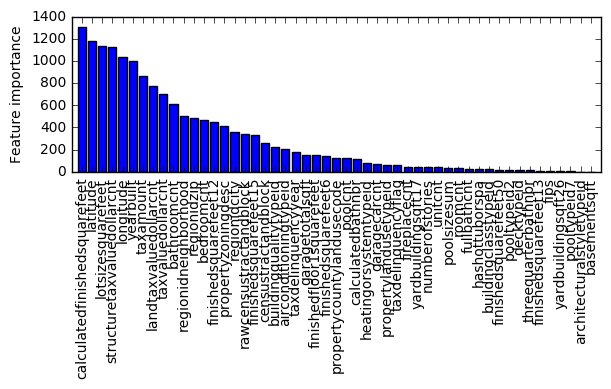

In [173]:
# show a graph of the feature importance
f_score = model.get_fscore()
importance = sorted(f_score.items(), key=operator.itemgetter(1), reverse=True)
print('of %d features the model considers %d of them significant' % (len(list(x_train)), len(importance)))
insignificant_features = set([item[0] for item in f_score.items()]).symmetric_difference(set(list(x_train)))
print('here are the insignificant features: %s' % sorted(list(insignificant_features)))

features = zip(*importance)[0]
scores = zip(*importance)[1]
x_pos = np.arange(len(features))
plt.figure()
plt.bar(x_pos, scores, align='center')
plt.xticks(x_pos, features, rotation='vertical')
plt.xlim(-1, len(x_pos))
plt.tight_layout()
plt.ylabel('Feature importance')
plt.show()

In [ ]:
column_name = 'predicted logerror'
# visualize the error for the predicted results
fig, ax = plt.subplots()
predictions_copy = np.copy(predictions)
predictions_copy.sort()
ax.scatter(range(predictions_copy.size), predictions_copy)
plt.ylabel(column_name)
plt.show()